# Research Available

In [ ]:
## This code is generate results generated from the library Py Torch VAE available in https://github.com/AntixK/PyTorch-VAE

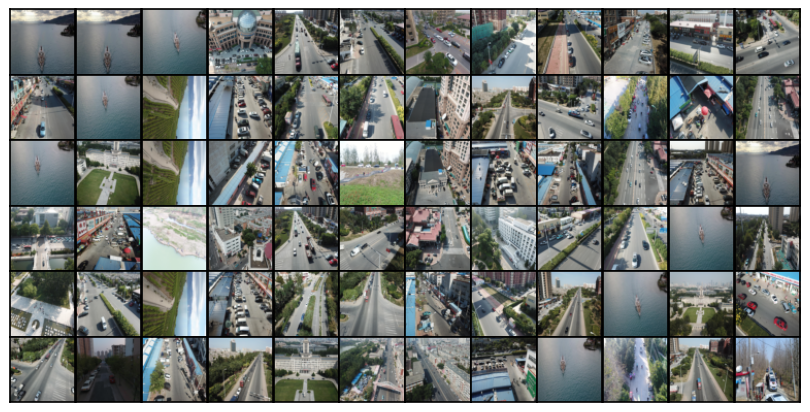

In [8]:
import torch
from torchvision.transforms import ToTensor, Resize
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np

directory_path = '<path to the images>'
images_folder_path = os.path.join(directory_path, 'images')

# Get the list of image files in the "images" folder
image_files = np.sort([file for file in os.listdir(images_folder_path) if file.endswith('.jpg')])

# Create a list to store the images
images = []

# Load, resize, and convert each image to tensor
transform = Resize((64, 64))
for i, image_file in enumerate(image_files):
    if i >= 72:
        break
    image_path = os.path.join(images_folder_path, image_file)
    image = Image.open(image_path)
    image = transform(image)
    image_tensor = ToTensor()(image)
    images.append(image_tensor)

# Create a grid to display the images
grid_size = (12, 12)
fig = plt.figure(figsize=(10.2, 10.2))
gs = gridspec.GridSpec(*grid_size, figure=fig)

# Display the images in the grid with borders
border_width = 1.2
for i in range(len(images)):
    ax = fig.add_subplot(gs[i // grid_size[1], i % grid_size[1]])
    ax.imshow(images[i].permute(1, 2, 0).numpy(), cmap='gray', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['left'].set_linewidth(border_width)
    ax.spines['right'].set_linewidth(border_width)

# Adjust the spacing between subplots
gs.update(wspace=0, hspace=0)

# Save the grid of images as a file
output_path = os.path.join(directory_path, 'image_grid.png')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# Show the grid of images
plt.show()

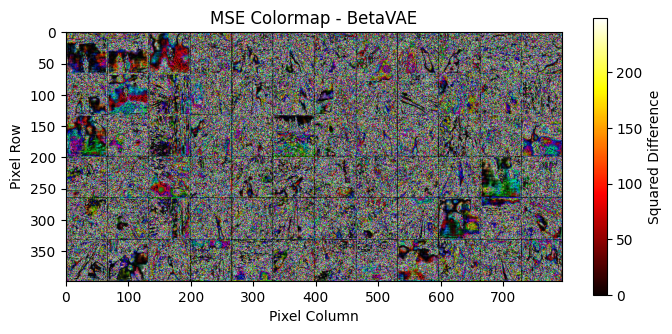

MSE between the images: 92.97566231662088
SSIM between the images: 0.4106263693693098
PSNR between the images: 16.012239385943644
Cosine similarity between the images: 0.8286195791749889


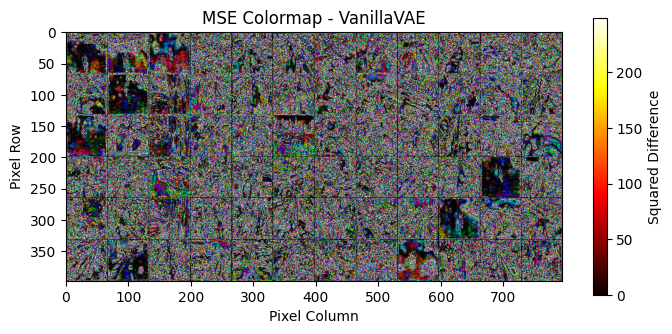

MSE between the images: 88.99269542506825
SSIM between the images: 0.46068259374601933
PSNR between the images: 16.388446385086116
Cosine similarity between the images: 0.8376713119655372


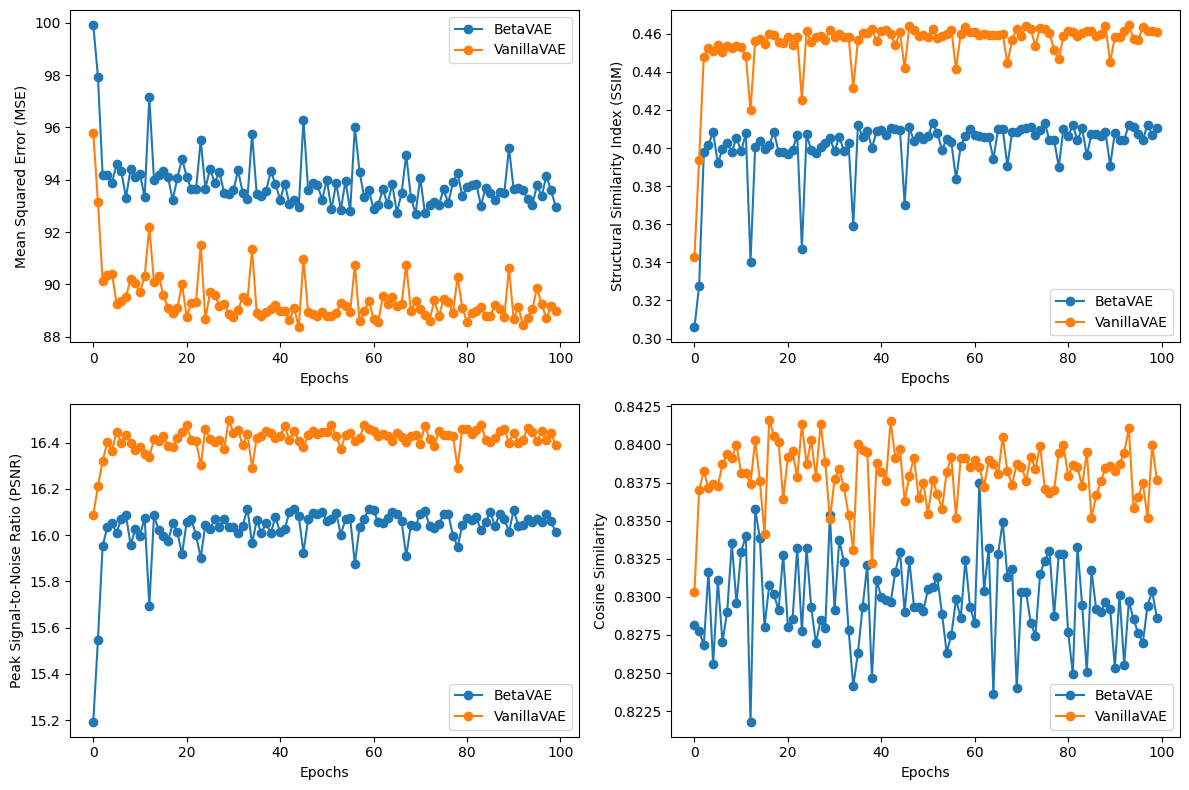

In [9]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.spatial.distance import cosine


vae_names = ['BetaVAE', 'VanillaVAE']

directory_path = 'PyTorch-VAE/logs/{}/version_0/Reconstructions'
reference_file = 'image_grid.jpg'

# Load the reference image
reference_image = Image.open(reference_file)

# Create dictionaries to store the metrics for each folder
mse_values_dict = {}
ssim_list_dict = {}
psnr_list_dict = {}
cosine_list_dict = {}

# Iterate over VAE names
for vae_name in vae_names:
    
    # Get the directory path for the current VAE
    current_directory = directory_path.format(vae_name)
    
    # Check if the directory exists
    if not os.path.exists(current_directory):
        continue
    
    # Get sorted file names in the directory
    sorted_files = sorted(os.listdir(current_directory))
    
    # Check if any image files exist in the directory
    image_files_exist = any(file.endswith(('.jpg', '.png')) for file in sorted_files)
    
    # Continue to the next VAE name if no image files exist
    if not image_files_exist:
        continue
    
    # Create lists to store the metrics
    mse_values = []
    ssim_list = []
    psnr_list = []
    cosine_list = []
    
    # Load the last image and iterate over sorted files
    for file in sorted_files:
        if file.endswith(('.jpg', '.png')):
            # Load the image
            current_image = Image.open(os.path.join(current_directory, file))

            # Resize the reference image to match the current image size
            resized_reference_image = reference_image.resize(current_image.size)

            # Convert the images to NumPy arrays
            reference_array = np.array(resized_reference_image)
            current_array = np.array(current_image)

            # Calculate the metrics
            mse = np.mean((reference_array - current_array) ** 2)
            ssim_value = ssim(reference_array, current_array, win_size=3, multichannel=True)         
            psnr_value = psnr(reference_array, current_array, data_range=current_array.max() - current_array.min())
            cosine_sim = 1 - cosine(reference_array.ravel(), current_array.ravel())
            
            # Append the metrics to the respective lists
            mse_values.append(mse)
            ssim_list.append(ssim_value)
            psnr_list.append(psnr_value)
            cosine_list.append(cosine_sim)
            
            
            # Plot the MSE colormap for the last file
            if file == sorted_files[-1]:
                
                
                plt.figure(figsize=(8, 6))
                im = plt.imshow((reference_array - current_array) ** 2, cmap='hot', vmin=0, vmax=np.max((reference_array - current_array) ** 2))
                cbar = plt.colorbar(im, label='Squared Difference', shrink=0.6)
                plt.xlabel('Pixel Column')
                plt.ylabel('Pixel Row')
                plt.title(f'MSE Colormap - {vae_name}')
                plt.show()
                
                last_index = len(mse_values) - 1
                print(f"MSE between the images: {mse_values[-1]}")
                print(f"SSIM between the images: {ssim_list[-1]}")
                print(f"PSNR between the images: {psnr_list[-1]}")
                print(f"Cosine similarity between the images: {cosine_list[-1]}")
    
    # Store the metrics in the dictionaries
    mse_values_dict[vae_name] = mse_values
    ssim_list_dict[vae_name] = ssim_list
    psnr_list_dict[vae_name] = psnr_list
    cosine_list_dict[vae_name] = cosine_list

import matplotlib.pyplot as plt

# Plot the MSE values for each folder
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for vae_name, mse_values in mse_values_dict.items():
    plt.plot(range(len(mse_values)), mse_values, '-o', label=vae_name)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# Plot the SSIM values for each folder
plt.subplot(2, 2, 2)
for vae_name, ssim_list in ssim_list_dict.items():
    plt.plot(range(len(ssim_list)), ssim_list, '-o', label=vae_name)
plt.xlabel('Epochs')
plt.ylabel('Structural Similarity Index (SSIM)')
plt.legend()

# Plot the PSNR values for each folder
plt.subplot(2, 2, 3)
for vae_name, psnr_list in psnr_list_dict.items():
    plt.plot(range(len(psnr_list)), psnr_list, '-o', label=vae_name)
plt.xlabel('Epochs')
plt.ylabel('Peak Signal-to-Noise Ratio (PSNR)')
plt.legend()

# Plot the cosine similarity values for each folder
plt.subplot(2, 2, 4)
for vae_name, cosine_list in cosine_list_dict.items():
    plt.plot(range(len(cosine_list)), cosine_list, '-o', label=vae_name)
plt.xlabel('Epochs')
plt.ylabel('Cosine Similarity')
plt.legend()

plt.tight_layout()
plt.savefig('subplot_image.png', dpi=400)
plt.show()
